In [2]:
 #FUNCTION TRANSFORM

In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
df=pd.read_csv("/Users/prathamsharma/Desktop/ML/train_titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
import numpy as np
import pandas as pd

import scipy.stats as stats #used for QQ Plots

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [13]:
df=pd.read_csv("/Users/prathamsharma/Desktop/ML/train_titanic.csv",usecols=["Survived","Age","Fare"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [15]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

/var/folders/km/pql1mrbj65jbf346hp94yd3h0000gn/T/ipykernel_39963/2595122914.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(),inplace=True)


In [17]:
df.isnull().sum()#earlier it had 177 null values in Age but after the previous code its 0 we have filled all the null values by the mean value of the age

Survived    0
Age         0
Fare        0
dtype: int64

In [18]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

/var/folders/km/pql1mrbj65jbf346hp94yd3h0000gn/T/ipykernel_39963/4058394945.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train["Age"])


Text(0.5, 1.0, 'QQ Plot')

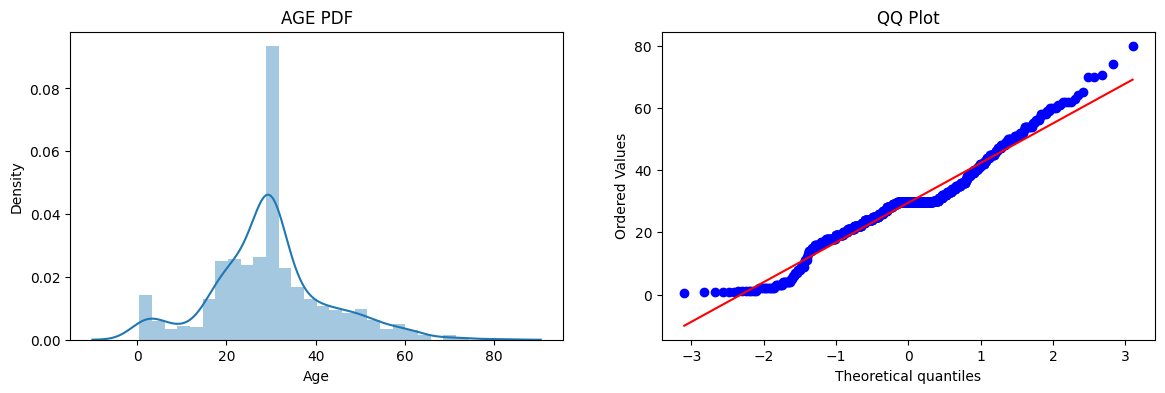

In [20]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train["Age"])
plt.title("AGE PDF")

plt.subplot(122)
stats.probplot(X_train["Age"],dist="norm",plot=plt)
plt.title("QQ Plot")

In [44]:
#ABOVE GRAPH IS CLOSE TO NORMAL DISTRIBUTION

Text(0.5, 1.0, 'QQ Plot')

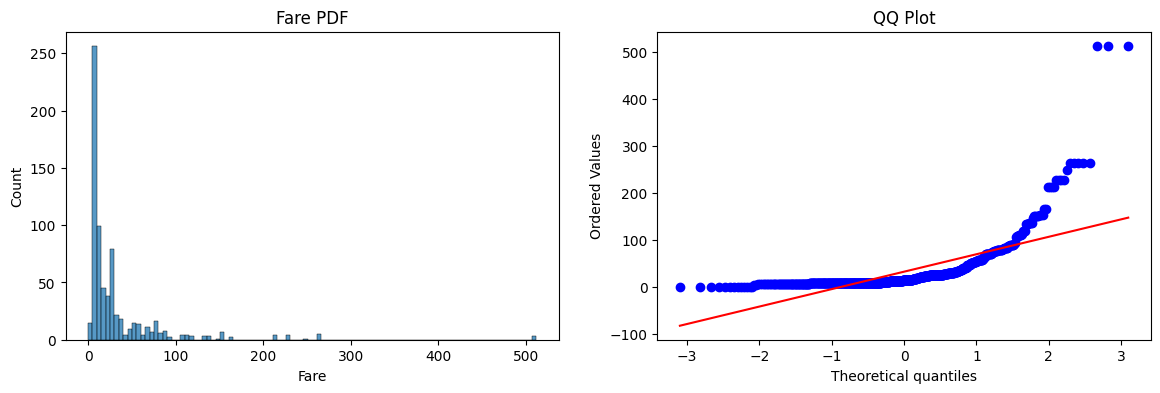

In [43]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train["Fare"])
plt.title("Fare PDF")

plt.subplot(122)
stats.probplot(X_train["Fare"],dist="norm",plot=plt)
plt.title("QQ Plot")

In [46]:
#ABOVE GRAPH IS NOT CLOSE TO NORMAL DISTRIBUTION AND IS RIGHT SKEWD AND WE SHOULD GO FOR LOG TRANSFORMER

In [60]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [78]:
clf.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)

Y_pred=clf.predict(X_test)
Y_pred1=clf2.predict(X_test)

print("Accuray LR",accuracy_score(Y_test,Y_pred))
print("Accuray DT",accuracy_score(Y_test,Y_pred1))

Accuray LR 0.6480446927374302
Accuray DT 0.6871508379888268


In [79]:
trf=FunctionTransformer(func=np.log1p) 
#np.log takes log of the value so if we have 0 as the value it would be ND to solve this we use np.log1P it first adds 1 and then take the log 

In [54]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

In [84]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_transformed,Y_train)
clf2.fit(X_train_transformed,Y_train)

Y_pred=clf.predict(X_test)
Y_pred1=clf2.predict(X_test)

print("Accuray LR",accuracy_score(Y_test,Y_pred))
print("Accuray DT",accuracy_score(Y_test,Y_pred1))

Accuray LR 0.7374301675977654
Accuray DT 0.5865921787709497


In [58]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_transformed,Y_train)
clf2.fit(X_train_transformed,Y_train)

Y_pred=clf.predict(X_test_transformed)
Y_pred1=clf2.predict(X_test_transformed)

print("Accuray LR",accuracy_score(Y_test,Y_pred))
print("Accuray DT",accuracy_score(Y_test,Y_pred1))

Accuray LR 0.6815642458100558
Accuray DT 0.6927374301675978


In [85]:
#Get better results in LogisticRegression after the pransformation